## Introduction

We will compare the following methods on simulated and semisynthetic data.

- ASSURE
- Coupled Bootstrap, with tuned epsilon
- Int. SURGE 1
- Int. SURGE 2
- Naive, implement if greater than zero.

We can also add on ASSURE with the neural network projection idea.

Some notes about each of the methods. Integrated SURGE 1,2 do not seem to target the welfare curve exactly (we do not know where to start)?

We will use the following DGPs for the true means, the standard errors will be drawn iid from some distribution.

- heavy tailed
- gaussian, slightly negative mean
- gaussian, slightly positive mean
- mixture of gaussians
- semisynthetic netflix
- semisynthetic OA
- all decisions have positive value
- all decisions have negative value
- Mixture of gaussians, but this time the variances for each group are different.

## TODO: 

- Update the methods code to take in a subset of methods
- Run Comparisons with the smoothed ASSURE on the cluster

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import os
import sys
sys.path.append("../")
import methods  
importlib.reload(methods)

<module 'methods' from '/Users/timothysudijono/Projects/statistics/empirical_bayes/CompoundWelfareMaximization/notebooks/../methods.py'>

In [2]:
def compare_methods(true_effects, sigmas, mc_runs = 50):
    """
    Methods: List of Strings of which methods to run
    """
    assure_welfares = np.zeros(mc_runs).astype(float)
    smooth_assure_welfares = np.zeros(mc_runs).astype(float)
    surge1_welfares = np.zeros(mc_runs).astype(float)
    surge2_welfares = np.zeros(mc_runs).astype(float)
    cb_welfares = np.zeros(mc_runs).astype(float)
    naive_welfares = np.zeros(mc_runs).astype(float)

    for j in range(mc_runs):
        Xs = true_effects + np.random.normal(0,sigmas)
        n = len(Xs)
        C_grid = np.linspace(-5, 5, 500)

        ### assure
        assure_curve = methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5);
        threshold = C_grid[np.argmax(assure_curve)]
        assure_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### smoothed_assure
        #smooth_assure_curve = methods.smoothen_via_nn(assure_curve, sigmas, len(Xs),C_grid).detach().numpy();
        #threshold = C_grid[np.argmax(smooth_assure_curve)]
        #smooth_assure_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### surge1
        surge1_welfare_curve = methods.integrated_surge(Xs, sigmas, lb = -5, ub = 5, type = 0, grid_points=500)
        threshold = C_grid[np.argmax(surge1_welfare_curve)]
        surge1_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### surge2
        surge2_welfare_curve = methods.integrated_surge(Xs, sigmas, lb = -5, ub = 5, type = 1, grid_points=500)
        threshold = C_grid[np.argmax(surge2_welfare_curve)]
        surge2_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### CB Welfare
        cb_welfare_curve = methods.coupled_bootstrap(Xs, sigmas,eps = 1./n**0.2, lb = -5, ub = 5)
        threshold = C_grid[np.argmax(cb_welfare_curve)]
        cb_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

        ### Naive 
        naive_welfares[j] = true_effects[Xs >= 0].sum()

    return [assure_welfares, surge1_welfares, surge2_welfares, naive_welfares, cb_welfares]


## Case I: Homogeneous Normal with Small Positive Mean

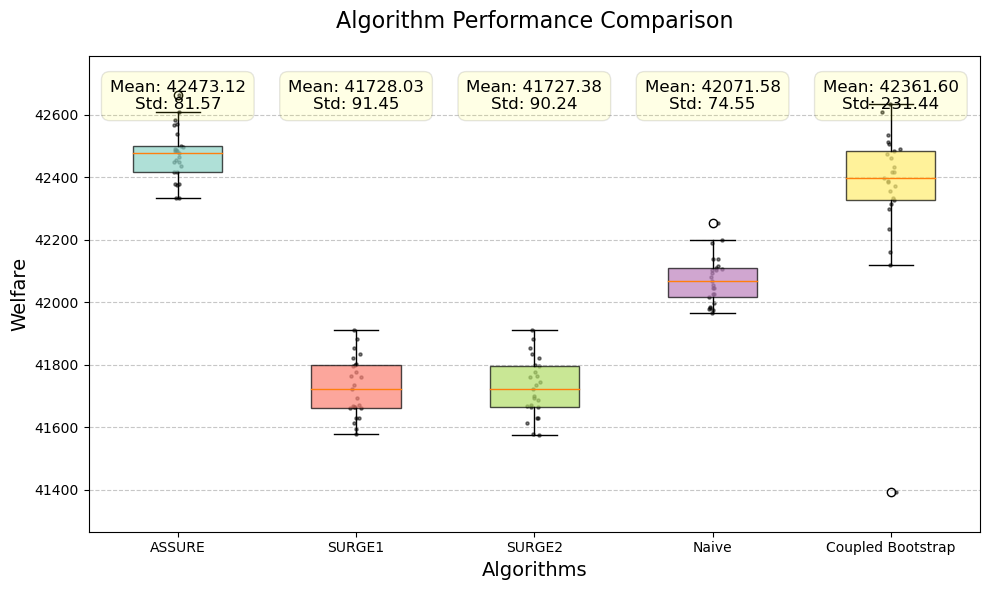

In [4]:
n = 100000
true_effects = np.random.normal(0.25,1,n)
sigmas = np.ones(n)

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

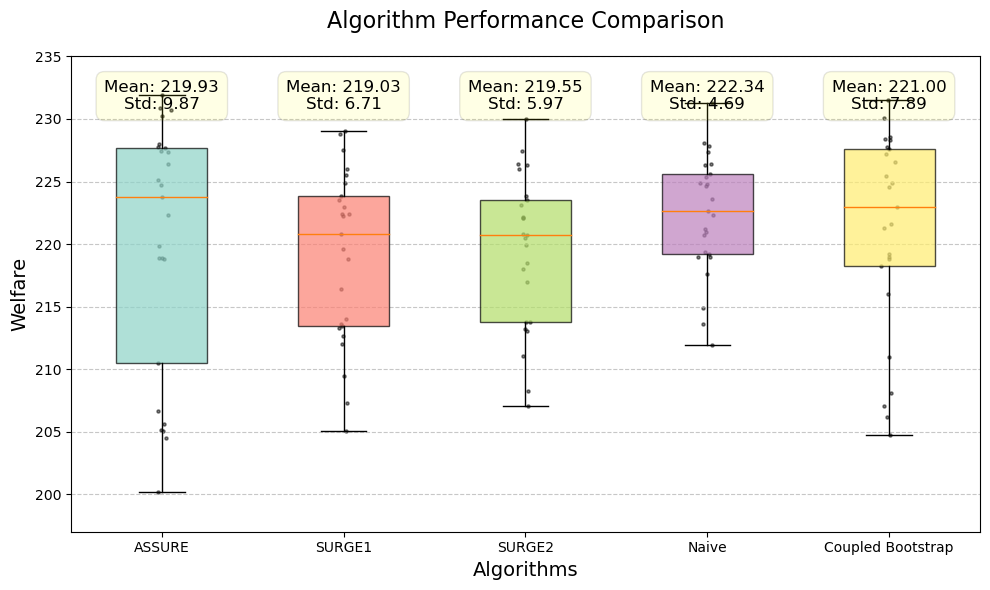

In [98]:
n = 500
true_effects = np.random.normal(0.25,1,n)
sigmas = np.ones(n)

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case 1.5: Homogeneous with Small Negative Mean

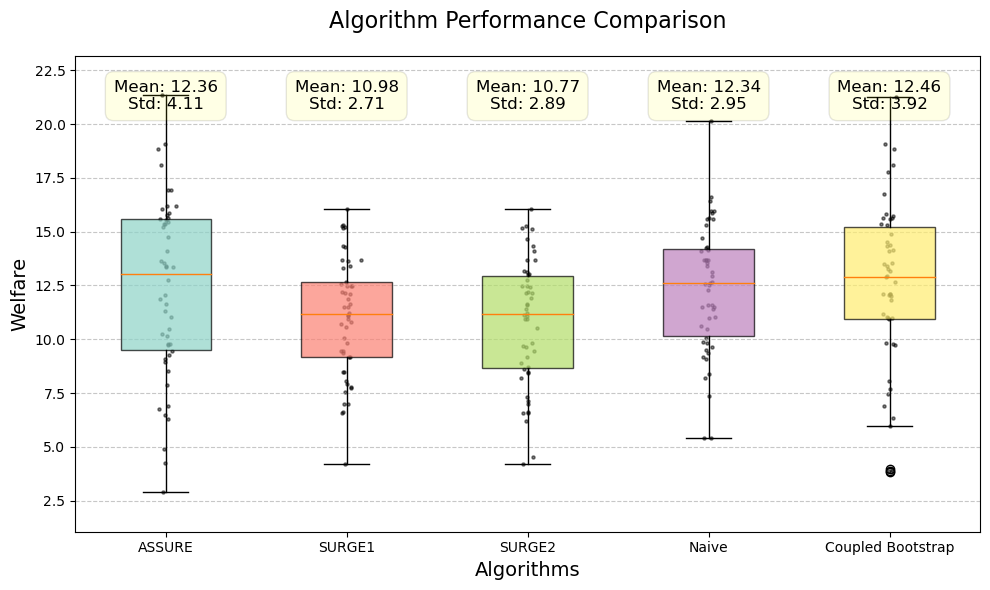

In [100]:
n = 100
true_effects = np.random.normal(-0.5,1,n)
sigmas = np.ones(n)

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 50)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

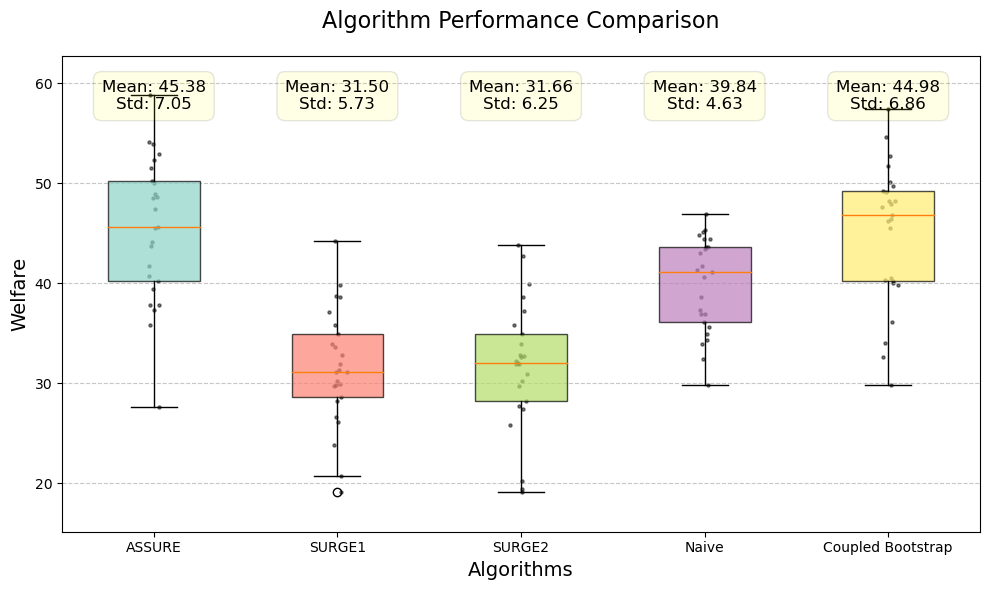

In [101]:
n = 500
true_effects = np.random.normal(-0.5,1,n)
sigmas = np.ones(n)

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case II: Heterogeneous Normal with Small Positive Mean

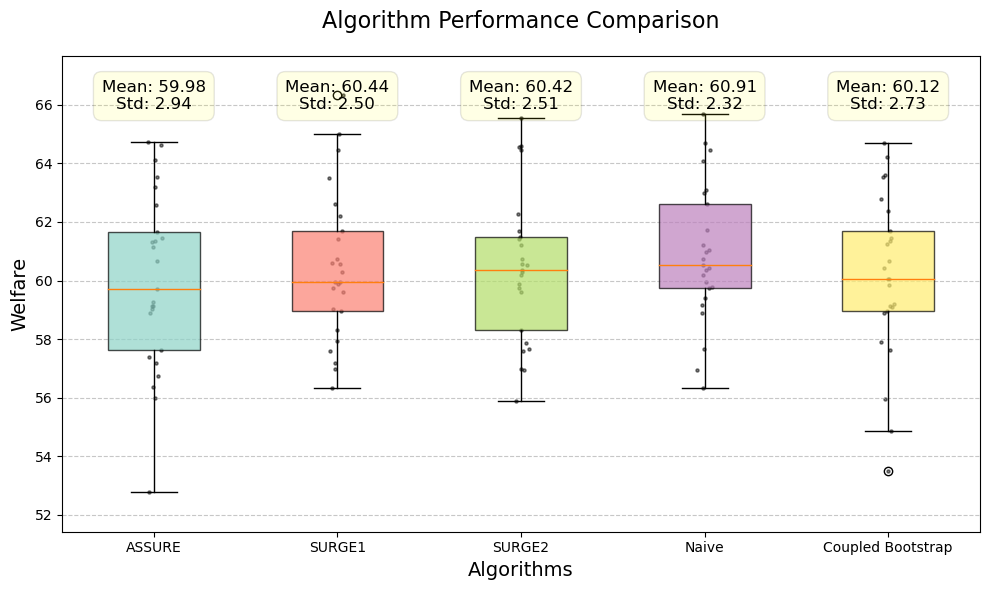

In [102]:
n = 100
true_effects = np.random.normal(0.5,1,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

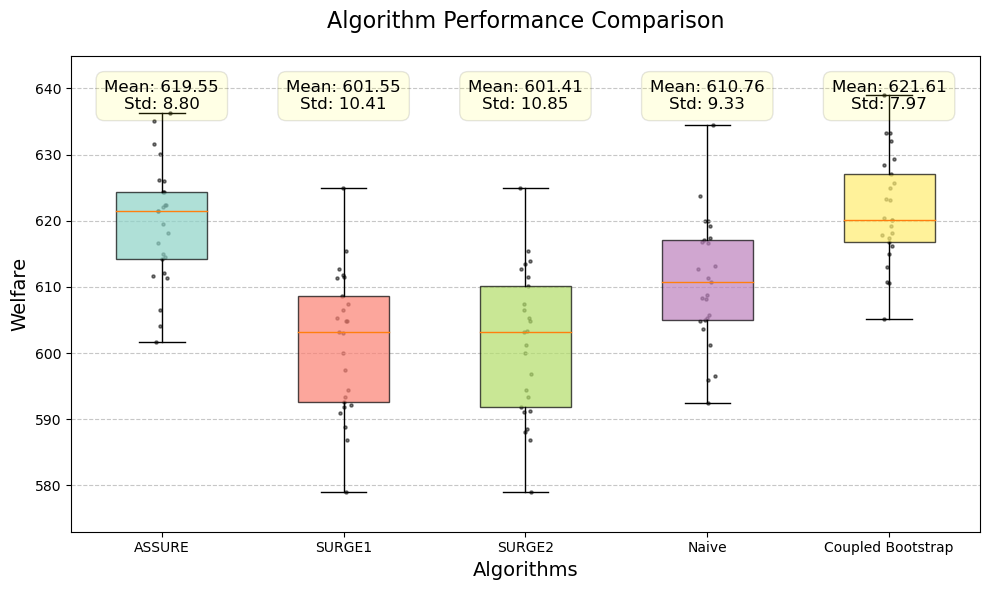

In [103]:
n = 1000
true_effects = np.random.normal(0.5,1,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case III: Heterogeneous Normal with Large Positive Mean

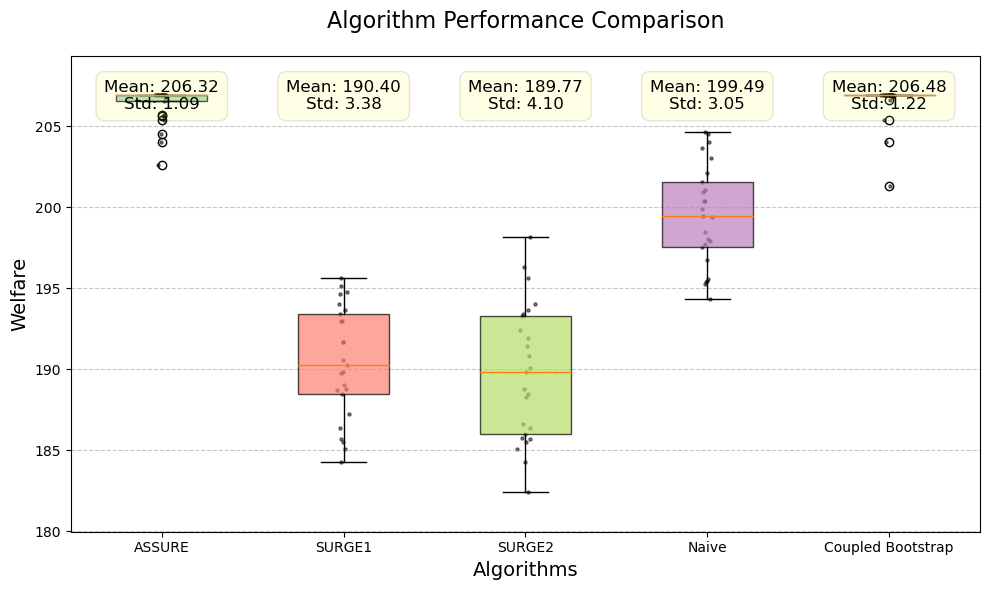

In [104]:
n = 100
true_effects = np.random.normal(2,1,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

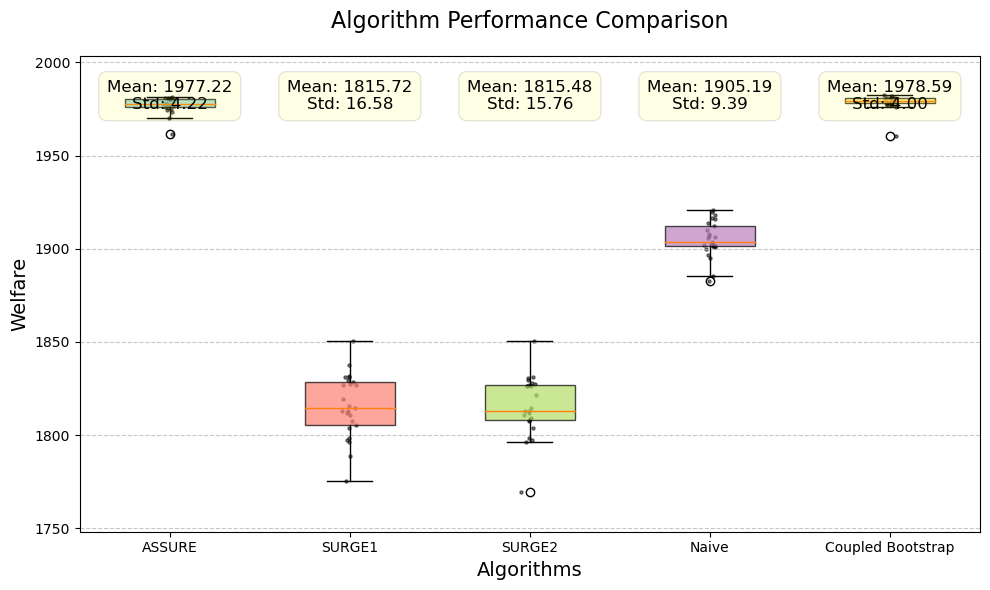

In [105]:
n = 1000
true_effects = np.random.normal(2,1,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case IV: All Decisions are Positive

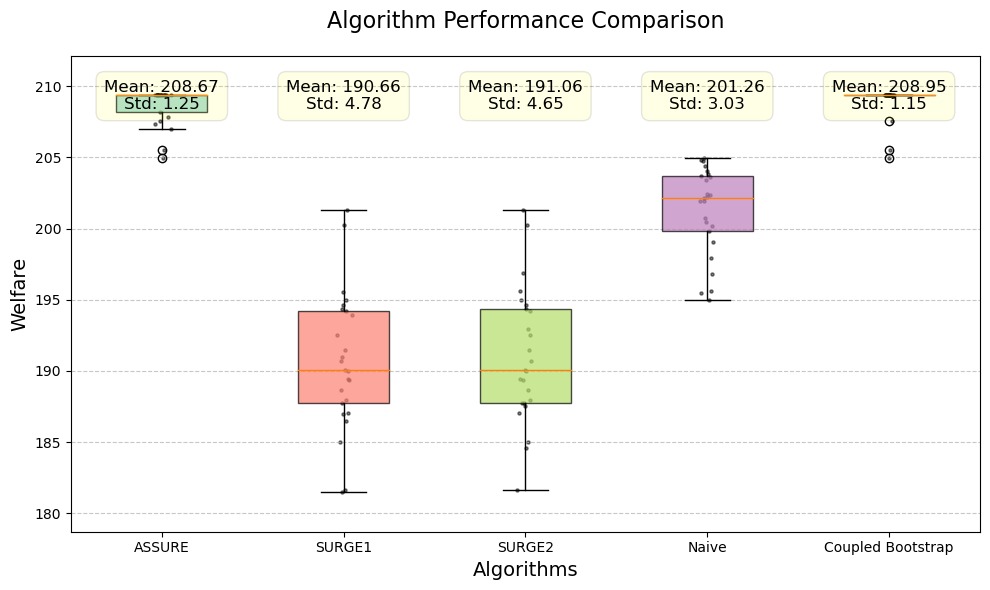

In [106]:
n = 100
true_effects = np.random.normal(2,0.5,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

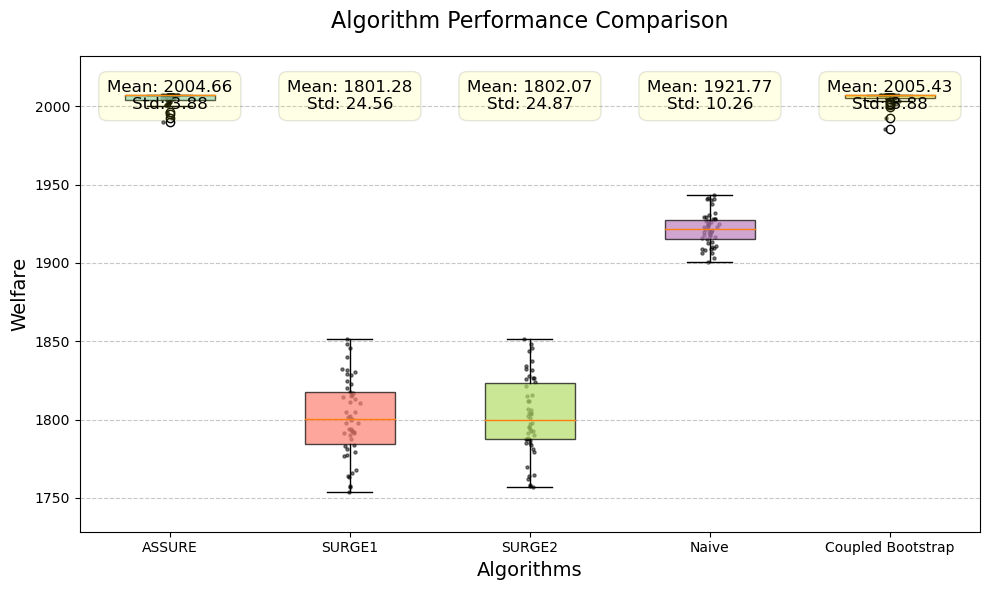

In [107]:
n = 1000
true_effects = np.random.normal(2,0.5,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 50)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

### With Larger Variances

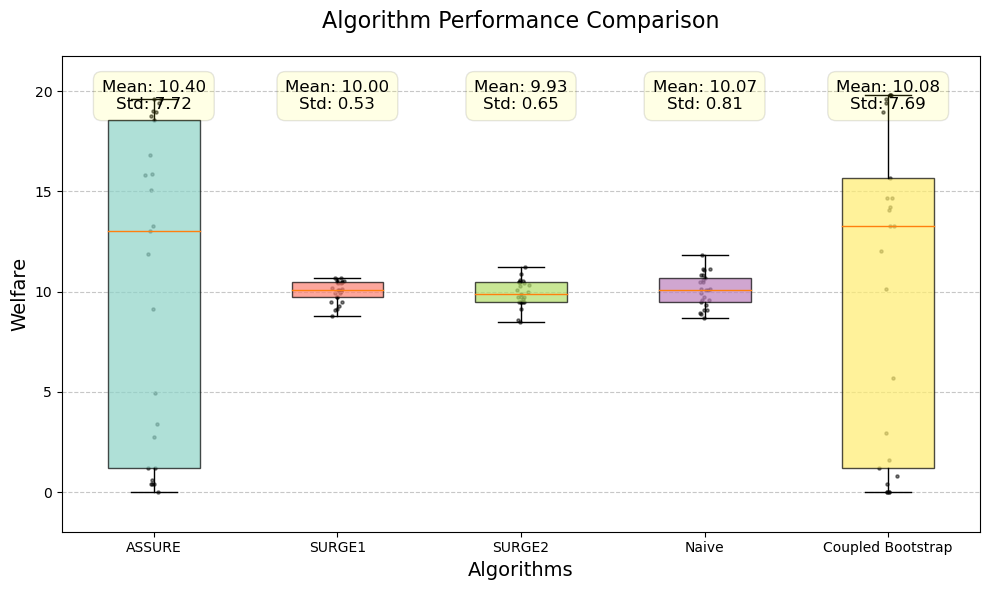

In [108]:
n = 100
true_effects = np.random.normal(0.2,0.01,n)
sigmas = np.random.chisquare(10,n)

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

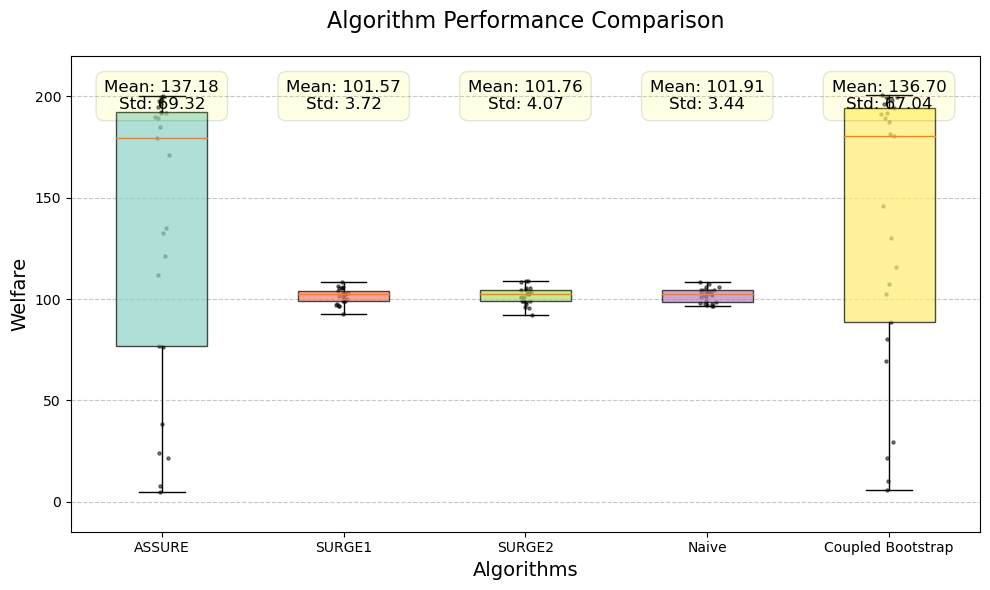

In [119]:
n = 1000
true_effects = np.random.normal(0.2,0.01,n)
sigmas = np.random.chisquare(10,n)

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

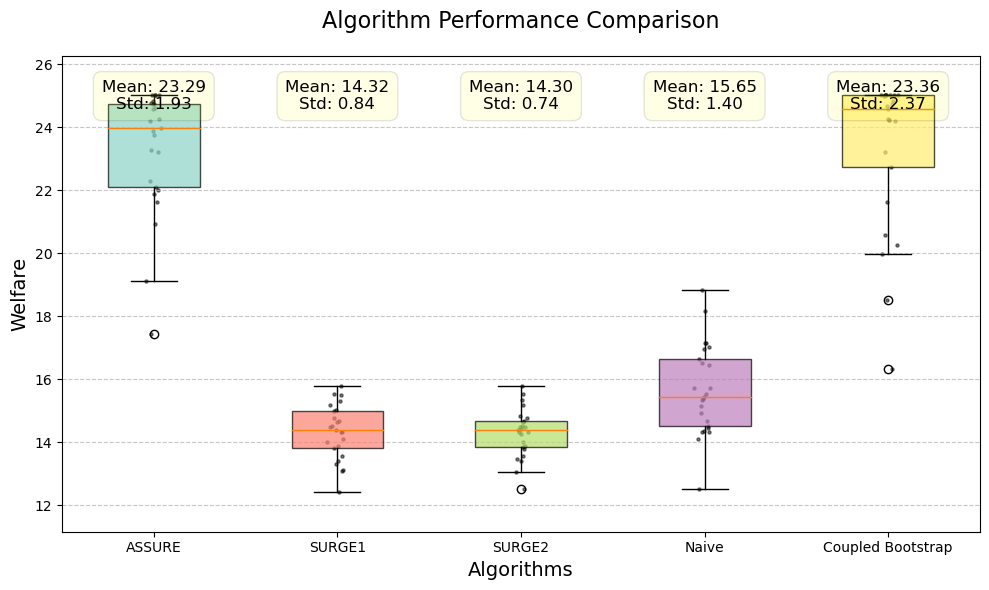

In [109]:
n = 100
true_effects = np.random.normal(0.25,0.1,n)
sigmas = np.ones(n)

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case V: All Decisions are Negative

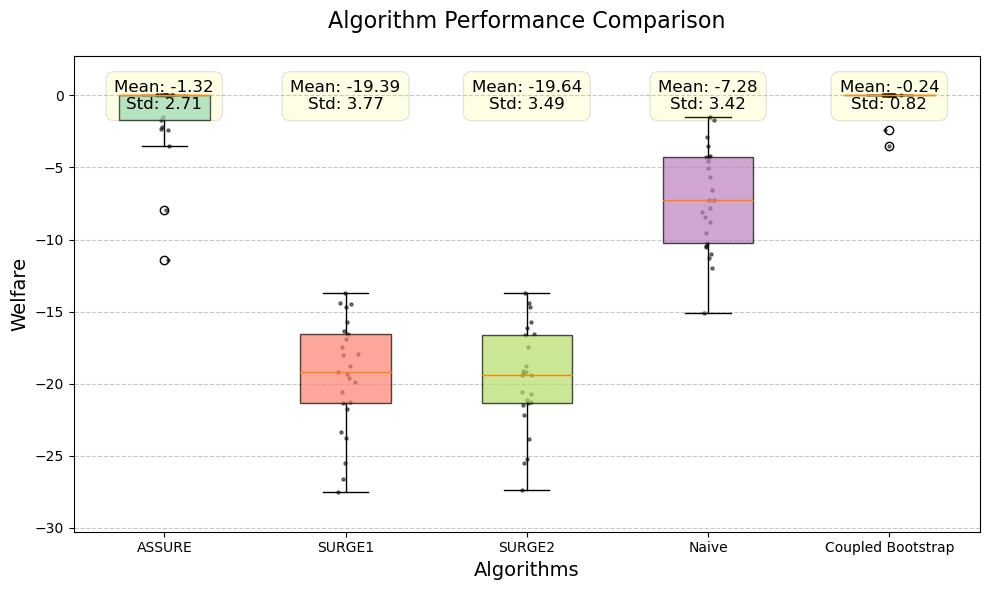

In [110]:
n = 100
true_effects = np.random.normal(-2,0.5,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

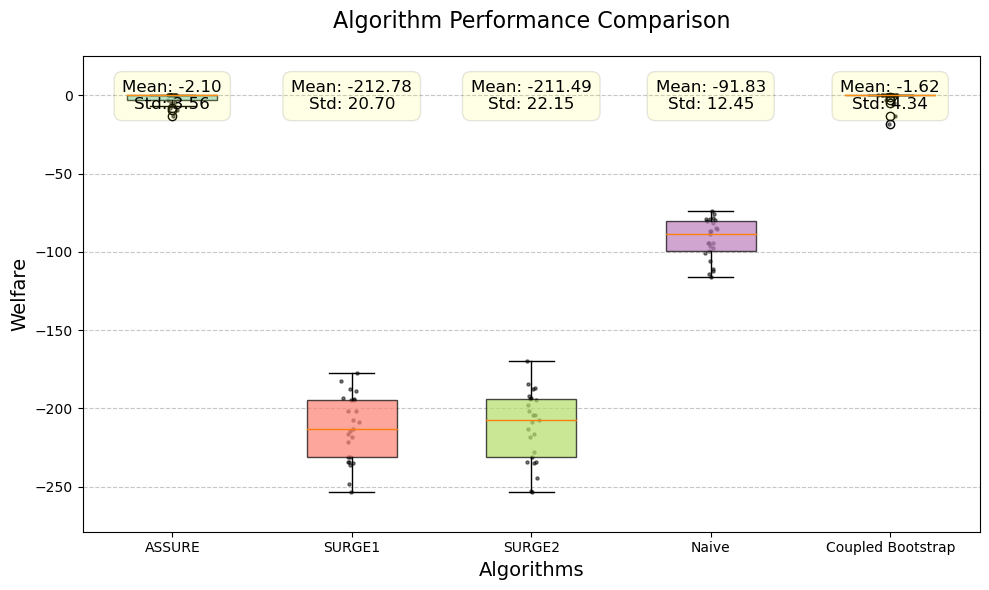

In [111]:
n = 1000
true_effects = np.random.normal(-2,0.5,n)
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case 6: Semisynthetic Data, Experimentation

In [112]:
import pandas as pd
df = pd.read_csv("../empirical_analyses/data/example_te_data.csv").iloc[:,1:]

np.random.seed(17)
n = df.shape[0]
true_effects = np.array(df["treatment_effects"])
sigmas = np.array(df["standard_errors"])

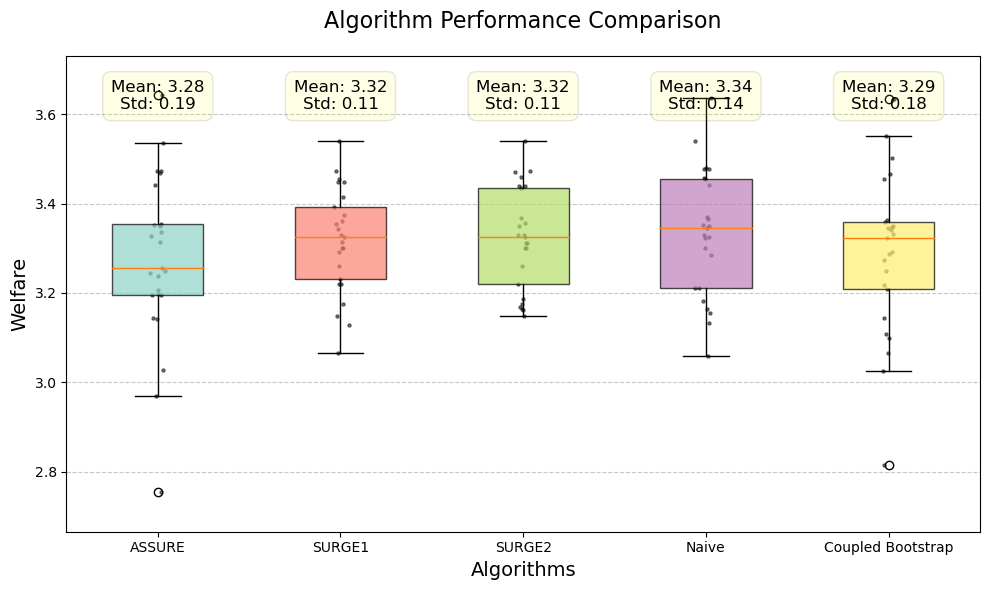

In [113]:

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case 7: OA

In [114]:
def load_data_for_outcome(est_var):
    """
    Load the processed data for a given outcome variable
    Filter out missing values and values where the standard error is too large
    """
    df = pd.read_feather("../empirical_analyses/data/oa_data_used.feather")
    se_var = est_var + "_se"
    subset = df[[est_var, se_var, "czname", "state", "county", "tract"]].dropna()
    thresh = subset[se_var].quantile(0.995)
    subset = subset.loc[subset[se_var] <= thresh].reset_index(drop=True)

    return subset

est_var = "kfr_top20_black_pooled_p25"
df = load_data_for_outcome(est_var)
true_effects = df[est_var].values
sigmas = df[est_var + "_se"].values

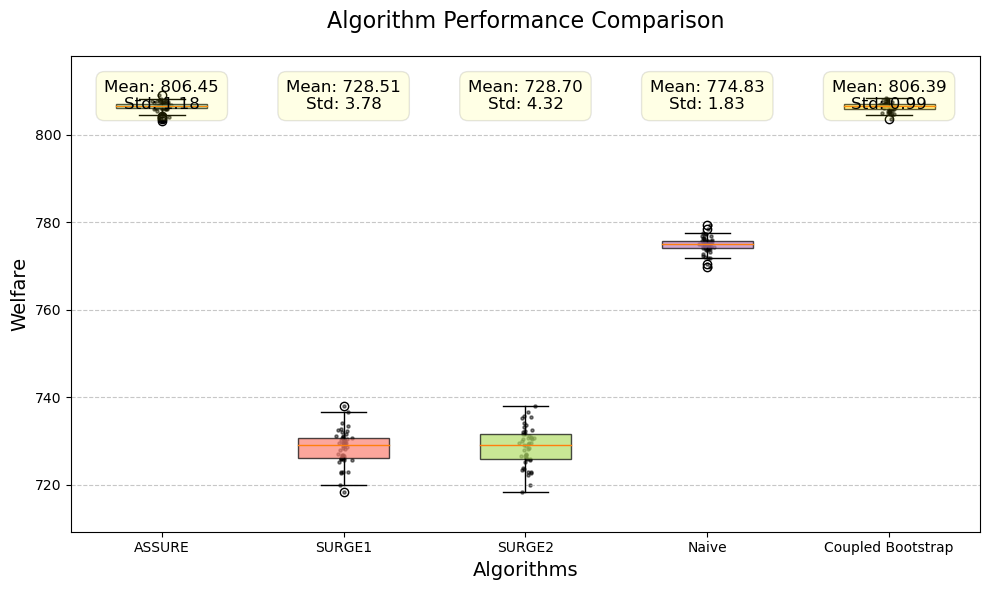

In [115]:
labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 50)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Case 8: Mixture

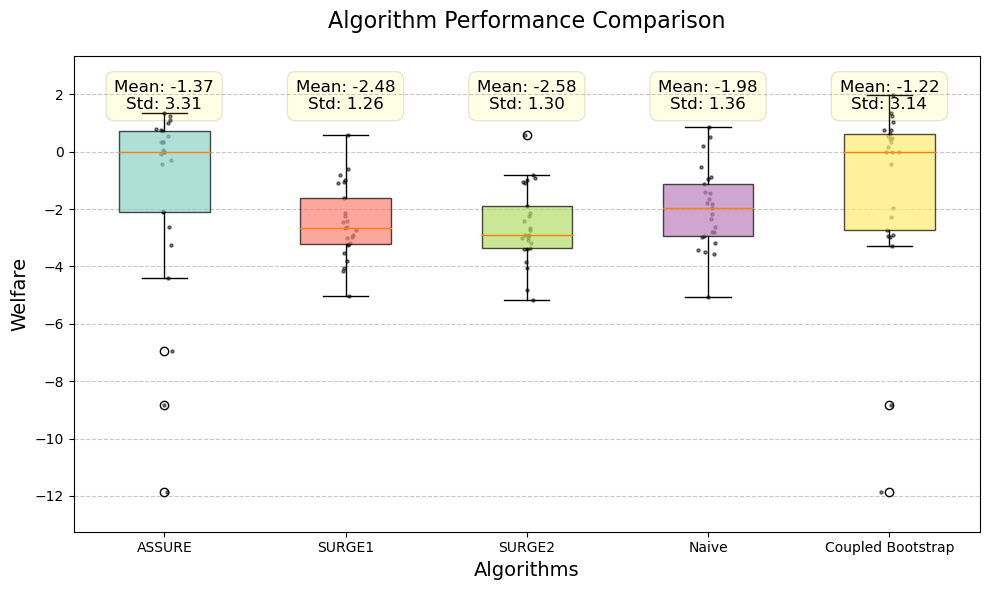

In [117]:
n = 100
true_effects = np.concatenate((np.random.normal(-0.2, 0.1, int(n/2)), np.random.normal(0,0.5,int(n/2))))
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

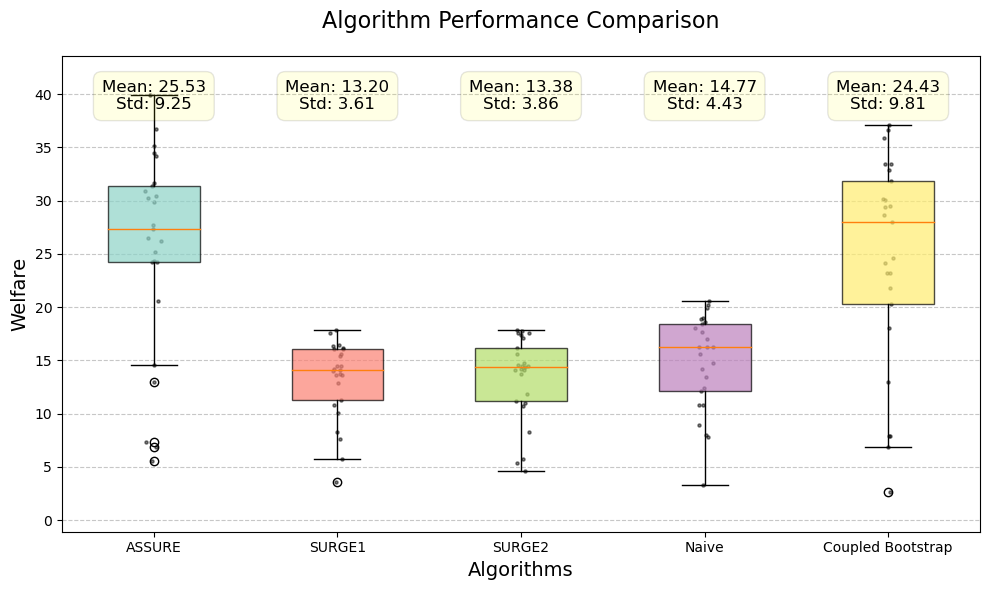

In [118]:
n = 1000
true_effects = np.concatenate((np.random.normal(-0.2, 0.1, int(n/2)), np.random.normal(0,0.5,int(n/2))))
sigmas = np.random.chisquare(5,n)/5

labels = ["ASSURE", "SURGE1", "SURGE2", "Naive", "Coupled Bootstrap"]

results = compare_methods(true_effects, sigmas, mc_runs = 25)
methods.compare_insample_welfares(results,labels, title="results/paired_scatter_comparison.pdf")

## Misc. Comparisons

In [143]:
np.random.seed(17)

n = 20000
#true_effects = np.random.normal(-0.5,0.5,n)
#sigmas = np.ones(n)

true_effects = np.concatenate((np.random.normal(-0.2, 0.1, int(n/2)), np.random.normal(0,0.5,int(n/2))))
sigmas = np.random.chisquare(5,n)/5

mc_runs = 100

cb_welfares = np.zeros(mc_runs).astype(float)
assure_welfares = np.zeros(mc_runs).astype(float)
naive_welfares = np.zeros(mc_runs).astype(float)

for j in range(mc_runs):
    Xs = true_effects + np.random.normal(0,sigmas)
    C_grid = np.linspace(-5, 5, 500)

    ### assure
    assure_curve = methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5);
    threshold = C_grid[np.argmax(assure_curve)]
    assure_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

    ### CB Welfare
    cb_welfare_curve = methods.coupled_bootstrap(Xs, sigmas,eps = 1, lb = -5, ub = 5)
    threshold = C_grid[np.argmax(cb_welfare_curve)]
    cb_welfares[j] = true_effects[Xs >= threshold*sigmas].sum()

    ### Naive 
    naive_welfares[j] = true_effects[Xs >= 0].sum()



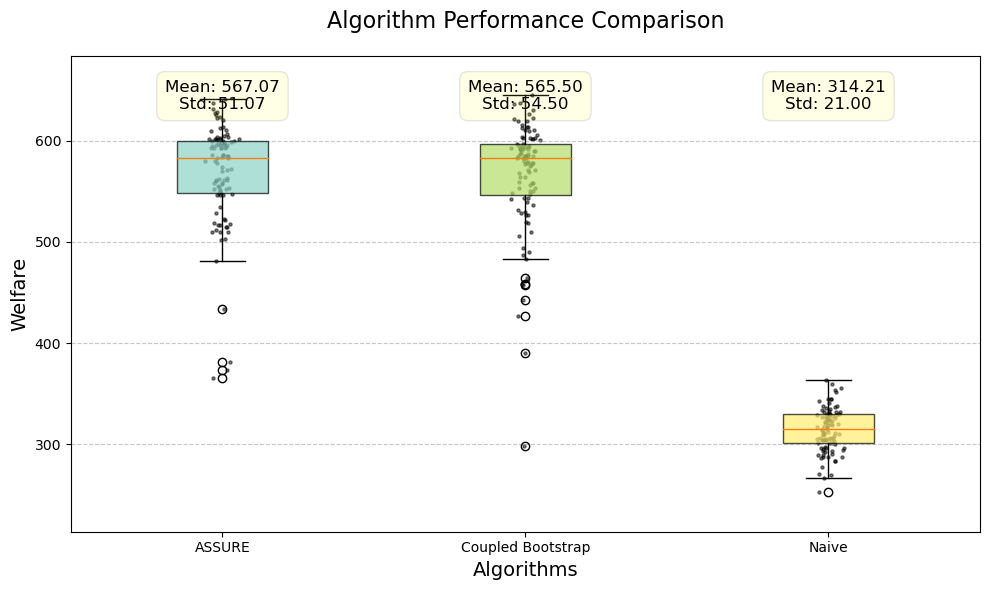

In [144]:
methods.compare_insample_welfares([assure_welfares, cb_welfares, naive_welfares], labels = ["ASSURE","Coupled Bootstrap", "Naive"],title = None)

0.52


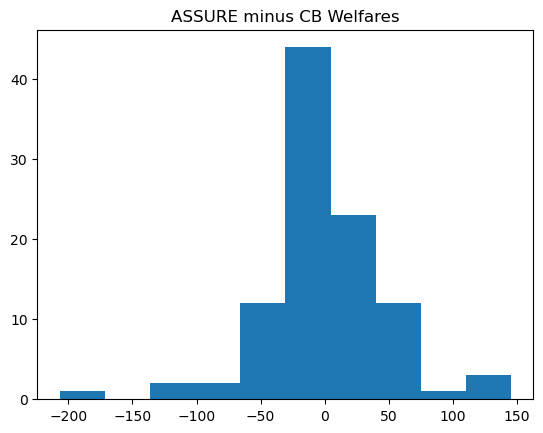

In [145]:
diffs = assure_welfares - cb_welfares
plt.hist(diffs)
plt.title("ASSURE minus CB Welfares")

print((diffs > 0).sum()/mc_runs)

NUWE Optimal Threshold: 0.47094188376753454
True Optimal Threshold: 0.831663326653306


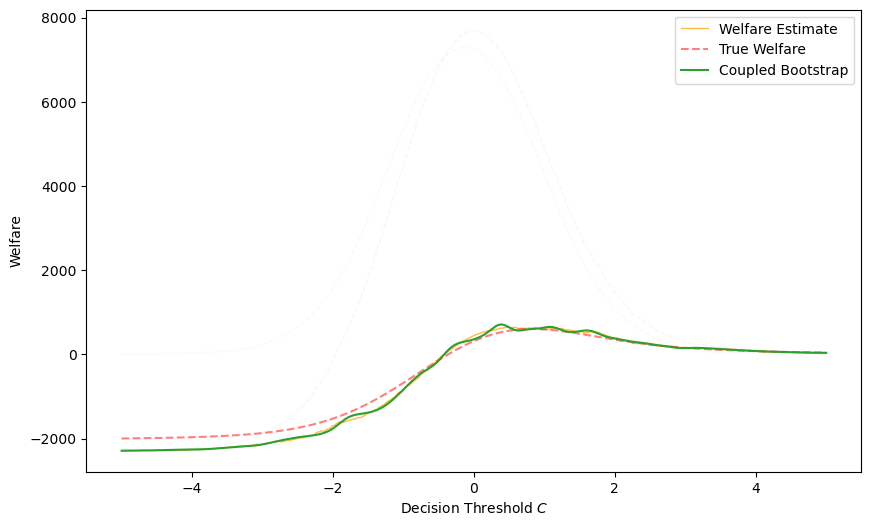

In [146]:

Xs = true_effects+np.random.normal(0,sigmas)

methods.heteroskedastic_normal_welfare_estimator(Xs, sigmas, lb = -5, ub = 5, plot = True, true_effects=true_effects);

cb = methods.coupled_bootstrap(Xs, sigmas, eps = 1./n**0.2)

C_grid = np.linspace(-5, 5, 500)
plt.plot(C_grid, cb, label = "Coupled Bootstrap")
plt.legend()